In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw5.ipynb")

# CPSC 330 - Applied Machine Learning 

## Homework 5: Putting it all together 
### Associated lectures: All material till lecture 13 

**Due date: [Monday, Mar 10, 11:59 pm](https://github.com/UBC-CS/cpsc330-2024W2?tab=readme-ov-file#deliverable-due-dates-tentative)**

## Table of contents
0. [Submission instructions](#si)
1. [Understanding the problem](#1)
2. [Data splitting](#2)
3. [EDA](#3)
4. [Feature engineering](#4)
5. [Preprocessing and transformations](#5) 
6. [Baseline model](#6)
7. [Linear models](#7)
8. [Different models](#8)
9. [Feature selection](#9)
10. [Hyperparameter optimization](#10)
11. [Interpretation and feature importances](#11) 
12. [Results on the test set](#12)
13. [Summary of the results](#13)
14. [Your takeaway from the course](#15)



### Final Test Score

The final test score for our best performing model (Gradient Boosting) is a test R² of **0.54** and a test MSE of **1.01**. 

<div class="alert alert-info">

## Submission instructions
<hr>
rubric={points:4}

**You may work with a partner on this homework and submit your assignment as a group.** Below are some instructions on working as a group.  
- The maximum group size is 2. 
- Use group work as an opportunity to collaborate and learn new things from each other. 
- Be respectful to each other and make sure you understand all the concepts in the assignment well. 
- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 
- You can find the instructions on how to do group submission on Gradescope [here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).
- If you would like to use late tokens for the homework, all group members must have the necessary late tokens available. Please note that the late tokens will be counted for all members of the group.   


Follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330-2024W2/blob/master/docs/homework_instructions.md). 

1. Before submitting the assignment, run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from "1" will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Follow the [CPSC 330 homework instructions](https://ubc-cs.github.io/cpsc330-2024W2/docs/homework_instructions.html), which include information on how to do your assignment and how to submit your assignment.
4. Upload your solution on Gradescope. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 
5. Make sure that the plots and output are rendered properly in your submitted file. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb so that the TAs can view your submission on Gradescope.


_Note: The assignments will get gradually more open-ended as we progress through the course. In many cases, there won't be a single correct solution. Sometimes you will have to make your own choices and your own decisions (for example, on what parameter values to use when they are not explicitly provided in the instructions). Use your own judgment in such cases and justify your choices, if necessary._

</div>

<!-- BEGIN QUESTION -->

## Imports

<div class="alert alert-warning">
    
Imports
    
</div>

_Points:_ 0

In [2]:
from hashlib import sha1
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import (
    GridSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.feature_selection import RFE, SequentialFeatureSelector
from sklearn.pipeline import Pipeline, make_pipeline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error
import shap
plt.rcParams["font.size"] = 16



<!-- END QUESTION -->

## Introduction <a name="in"></a>

In this homework you will be working on an open-ended mini-project, where you will put all the different things you have learned so far together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips
1. This mini-project is open-ended, and while working on it, there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 

#### Assessment
We plan to grade fairly and leniently. We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you do a bunch of sane things and get a lower accuracy than your friend, don't sweat it.


#### A final note
Finally, this style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "a few hours" (15-20 hours???) is a good guideline for this project . Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and I hope you enjoy it as well. 

<br><br>

<!-- BEGIN QUESTION -->

## 1. Pick your problem and explain the prediction problem <a name="1"></a>
<hr>
rubric={points:3}

In this mini project, you have the option to choose on which dataset you will be working on. The tasks you will need to carry on will be similar, independently of your choice.

### Option 1
You can choose to work on a classification problem of predicting whether a credit card client will default or not. 
For this problem, you will use [Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). In this data set, there are 30,000 examples and 24 features, and the goal is to estimate whether a person will default (fail to pay) their credit card bills; this column is labeled "default.payment.next.month" in the data. The rest of the columns can be used as features. You may take some ideas and compare your results with [the associated research paper](https://www.sciencedirect.com/science/article/pii/S0957417407006719), which is available through [the UBC library](https://www.library.ubc.ca/). 


### Option 2
You can choose to work on a regression problem using a [dataset](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data) of New York City Airbnb listings from 2019. As usual, you'll need to start by downloading the dataset, then you will try to predict `reviews_per_month`, as a proxy for the popularity of the listing. Airbnb could use this sort of model to predict how popular future listings might be before they are posted, perhaps to help guide hosts create more appealing listings. In reality they might instead use something like vacancy rate or average rating as their target, but we do not have that available here.

> Note there is an updated version of this dataset with more features available [here](http://insideairbnb.com/). The features were are using in `listings.csv.gz` for the New York city datasets. You will also see some other files like `reviews.csv.gz`. For your own interest you may want to explore the expanded dataset and try your analysis there. However, please submit your results on the dataset obtained from Kaggle.


**Your tasks:**

1. Spend some time understanding the options and pick the one you find more interesting (it may help spending some time looking at the documentation available on Kaggle for each dataset).
2. After making your choice, focus on understanding the problem and what each feature means, again using the documentation on the dataset page on Kaggle. Write a few sentences on your initial thoughts on the problem and the dataset. 
3. Download the dataset and read it as a pandas dataframe. 

<div class="alert alert-warning">
    
Solution_1
    
</div>

_Points:_ 3

_Type your answer here, replacing this text._

In [3]:
df = pd.read_csv('data/AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


This dataset offers a rich look at New York City short-term rentals from 2019. It includes a wide range of details about each listing, such as property characteristics, host information, location indicators, pricing, booking requirements, and guest feedback. My aim is to predict the average monthly review count as a proxy for popularity. I find it interesting to explore how aspects like geographic location, rental cost, and stay requirements influence guest engagement. Understanding these relationships could provide valuable insights for hosts looking to make their listings more appealing before they go live.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 2. Data splitting <a name="2"></a>
<hr>
rubric={points:2}

**Your tasks:**

1. Split the data into train (70%) and test (30%) portions with `random_state=123`.

> If your computer cannot handle training on 70% training data, make the test split bigger.  

<div class="alert alert-warning">
    
Solution_2
    
</div>

_Points:_ 2

In [4]:
df = df.replace("?", np.nan)

# Separate features and target
X = df.drop(columns=["reviews_per_month"])
y = df["reviews_per_month"]

# Fill missing target values using the median 
y = y.fillna(y.median())

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=123
)

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 3. EDA <a name="3"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Perform exploratory data analysis on the train set.
2. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
3. Summarize your initial observations about the data. 
4. Pick appropriate metric/metrics for assessment. 

<div class="alert alert-warning">
    
Solution_3
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [5]:
#  Summary statistics for X_train (features)
print("Summary statistics for features (X_train):")
print(X_train.describe())

Summary statistics for features (X_train):
                 id       host_id      latitude     longitude         price  \
count  3.422600e+04  3.422600e+04  34226.000000  34226.000000  34226.000000   
mean   1.893979e+07  6.726273e+07     40.729142    -73.952083    151.528399   
std    1.101332e+07  7.840511e+07      0.054531      0.046201    236.628392   
min    2.539000e+03  2.438000e+03     40.506410    -74.244420      0.000000   
25%    9.394482e+06  7.721897e+06     40.690193    -73.983030     69.000000   
50%    1.954546e+07  3.074526e+07     40.723240    -73.955550    106.000000   
75%    2.915085e+07  1.068375e+08     40.763287    -73.936270    175.000000   
max    3.648561e+07  2.743213e+08     40.912340    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  calculated_host_listings_count  \
count    34226.000000       34226.000000                    34226.000000   
mean         7.094957          23.244814                        7.042453   
std         21.54

- The id column has 34,226 values with an average of approximately 18,939,790, a standard deviation of about 11,013,320, a minimum value of 2,539, and a maximum value of 36,485,610.
- The host_id column has 34,226 values with an average of roughly 67,262,730, a standard deviation of about 78,405,110, a minimum of 2,438, and a maximum of 274,321,300.
- The latitude column shows a mean of 40.729142 and a standard deviation of 0.054531, with values that range from 40.506410 to 40.912340, which indicates that the listings appear in a concentrated geographic area.
- The longitude column shows a mean of -73.952083 and a standard deviation of 0.046201, with values that range from -74.244420 to -73.712990, which confirms the tight geographic grouping.
- The price column shows 34,226 values with an average of about 151.53, a median of 106, a standard deviation of 236.63, and values that range from \$0 to \$10,000. This fact suggests that a few high-priced outliers exist.
- The minimum_nights column shows an average of approximately 7.09 nights and a median of 3 nights. Values range from 1 to 1,250, which reveals the presence of a few extreme cases.
- The number_of_reviews column shows an average of 23.24 reviews with a standard deviation of 44.57, a median of 5, and a maximum of 629. This fact indicates that most values are low, but some are very high.
- The calculated_host_listings_count column shows an average of 7.04, a median of 1, and a maximum of 327. This fact indicates that most hosts have one listing while some have many.
- The availability_365 column shows an average of 112.53 days with a median of 45 days and values that range from 0 to 365. This fact reflects a wide variation in availability.


In [6]:
# Summary statistics for y_train (target)
print("\nSummary statistics for reviews_per_month (y_train):")
print(y_train.describe())


Summary statistics for reviews_per_month (y_train):
count    34226.000000
mean         1.237104
std          1.539604
min          0.010000
25%          0.280000
50%          0.720000
75%          1.570000
max         58.500000
Name: reviews_per_month, dtype: float64


The reviews_per_month column comprises 34,226 observations with an average value of approximately 1.24, a median of 0.72, and a standard deviation of about 1.54. The values range from 0.01 to 58.50, indicating that most observations are low while a few are exceptionally high.

In [7]:
# 1) Calculate IQR boundaries for 'price'
Q1_price = X_train["price"].quantile(0.25)
Q3_price = X_train["price"].quantile(0.75)
IQR_price = Q3_price - Q1_price
lower_bound_price = Q1_price - 1.5 * IQR_price
upper_bound_price = Q3_price + 1.5 * IQR_price

# 2) Calculate IQR boundaries for 'minimum_nights'
Q1_nights = X_train["minimum_nights"].quantile(0.25)
Q3_nights = X_train["minimum_nights"].quantile(0.75)
IQR_nights = Q3_nights - Q1_nights
lower_bound_nights = Q1_nights - 1.5 * IQR_nights
upper_bound_nights = Q3_nights + 1.5 * IQR_nights

filter_condition = (
    (X_train["price"] >= lower_bound_price) &
    (X_train["price"] <= upper_bound_price) &
    (X_train["minimum_nights"] >= lower_bound_nights) &
    (X_train["minimum_nights"] <= upper_bound_nights)
)

# 3) Filter X_train and y_train based on this condition
X_train_no_outliers = X_train[filter_condition].copy()
y_train_no_outliers = y_train[filter_condition].copy()

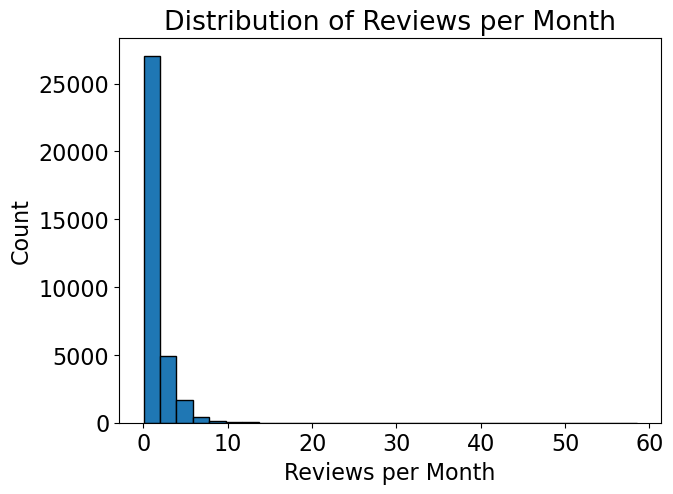

In [8]:
# Histogram of reviews_per_month (target = y_train)
plt.figure(figsize=(7, 5))
plt.hist(y_train, bins=30, edgecolor="black")
plt.xlabel("Reviews per Month")
plt.ylabel("Count")
plt.title("Distribution of Reviews per Month")
plt.show()

**Distribution of Reviews per Month**
- The histogram shows that most listings receive very few reviews per month.  
- A large number of listings have close to 0 reviews, indicating that they may not be frequently booked.  
- The distribution is right-skewed, with a few listings receiving significantly more reviews per month.  
- Some extreme values exist where a few listings get over 50 reviews per month, but these are rare cases.


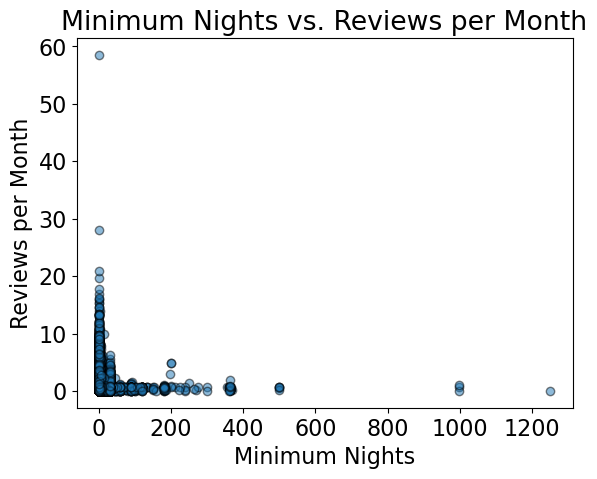

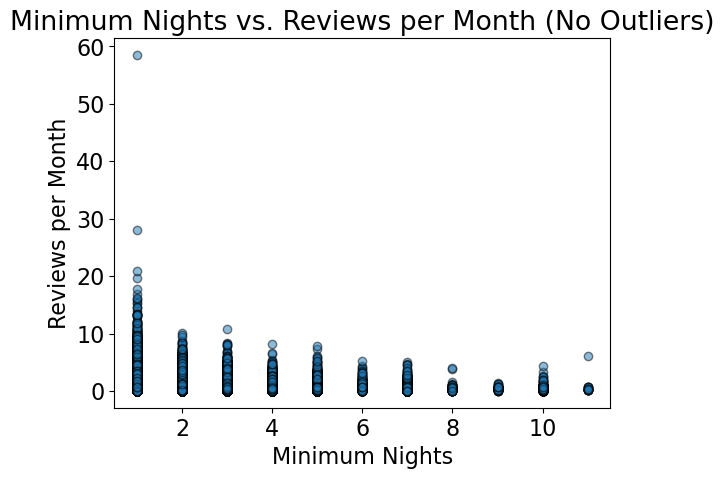

In [9]:
# Scatter Plot: minimum_nights vs. reviews_per_month
plt.scatter(X_train["minimum_nights"], y_train, alpha=0.5, edgecolor="black")
plt.xlabel("Minimum Nights")
plt.ylabel("Reviews per Month")
plt.title("Minimum Nights vs. Reviews per Month")
plt.show()

plt.scatter(X_train_no_outliers["minimum_nights"], y_train_no_outliers, alpha=0.5, edgecolor="black")
plt.xlabel("Minimum Nights")
plt.ylabel("Reviews per Month")
plt.title("Minimum Nights vs. Reviews per Month (No Outliers)")
plt.show()

**Minimum Nights vs. Reviews per Month (All Data)**

- The first scatter plot shows that most listings have a minimum nights value close to 1, with very few requiring long stays.  
- A strong concentration of points appears at the lower end of the x-axis, while listings with a higher minimum nights requirement are rare.  
- The number of reviews per month decreases as the minimum nights increase.  
- A few extreme values with high minimum nights exist, but these listings do not receive many reviews.

**Minimum Nights vs. Reviews per Month (No Outliers)**

- The second scatter plot removes outliers, making the trend more visible.  
- The listings with lower minimum nights tend to receive more reviews, showing a clear pattern.  
- As minimum nights increase, the number of reviews per month generally decreases.  
- The cleaned data confirms that shorter stays lead to higher review activity, likely because more guests cycle through these listings.


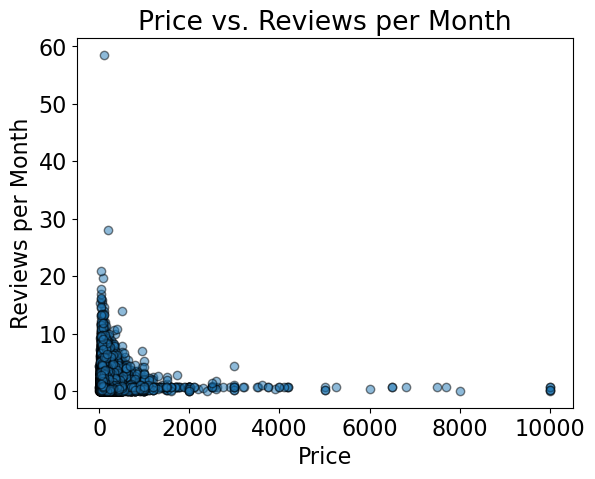

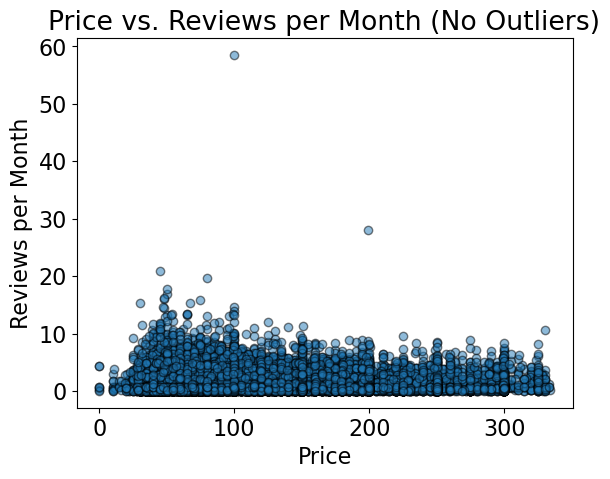

In [10]:
# Scatter Plot: price vs reviews_per_month
plt.scatter(X_train["price"], y_train, alpha=0.5, edgecolor="black")
plt.title("Price vs. Reviews per Month")
plt.xlabel("Price")
plt.ylabel("Reviews per Month")
plt.show()

plt.scatter(X_train_no_outliers["price"], y_train_no_outliers, alpha=0.5, edgecolor="black")
plt.title("Price vs. Reviews per Month (No Outliers)")
plt.xlabel("Price")
plt.ylabel("Reviews per Month")
plt.show()

**Price vs. Reviews per Month (All Data)**

- The first scatter plot shows a large concentration of listings with lower prices, mostly below $500.  
- As price increases, the number of reviews per month generally decreases.  
- A few extreme cases exist where listings with prices up to 10,000 still receive reviews, but they are rare.  
- Most properties that receive frequent reviews tend to have lower prices.

**Price vs. Reviews per Month (No Outliers)**

- The second scatter plot removes outliers, making the pattern clearer.  
- The price range now focuses on more typical listings, mainly below $300.  
- A similar trend appears where listings with lower prices tend to receive more reviews per month.  
- Higher-priced listings exist but generally receive fewer reviews, reinforcing the trend seen in the full dataset.


**Initial Observations**

The dataset has many listings with low minimum nights and low prices, but a few have extremely high values.
For minimum nights, most listings allow short stays, and these listings tend to get more reviews. In contrast, listings with longer minimum stays usually get fewer reviews. For price, most listings have lower prices and tend to get more reviews, while higher-priced listings usually get fewer reviews. The number of reviews per month is highly skewed. Most listings get less than 10 reviews per month, while a small number get significantly more. Higher-priced listings generally get fewer reviews, suggesting that guests may prefer budget-friendly options. 

**Metrics for Assessment**

Appropriate regression metrics would be:  

- **Mean Absolute Error (MAE):** Measures the average absolute difference between predictions and actual values. It is useful because it is interpretable in the same units as the target variable.
- **Root Mean Squared Error (RMSE):** Penalizes larger errors more than MAE and is useful when large deviations need to be minimized.
  
- **R² Score:** Measures how well the independent variables explain the variance in the target variable.

Since the target variable is highly skewed, transformations such as log-scaling may also be considered to improve model performance.


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 4. Feature engineering <a name="4"></a>
<hr>
rubric={points:1}

**Your tasks:**

1. Carry out feature engineering. In other words, extract new features relevant for the problem and work with your new feature set in the following exercises. You may have to go back and forth between feature engineering and preprocessing. 

<div class="alert alert-warning">
    
Solution_4
    
</div>

_Points:_ 1

In [11]:
# Convert last_review to datetime
X_train["last_review"] = pd.to_datetime(X_train["last_review"], errors="coerce")
reference_date = pd.to_datetime("2019-12-31")

# Compute days since last review
X_train["days_since_last_review"] = (reference_date - X_train["last_review"]).dt.days

# Log Transformations
X_train["log_transformed_price"] = np.log1p(X_train["price"])
X_train["log_transformed_min_nights"] = np.log1p(X_train["minimum_nights"])

# Considering availability
X_train["adjusted_price_per_night"] = X_train["price"] / (X_train["availability_365"] + 1)

X_train["calculated_host_listings_count"] = X_train.groupby("host_id")["host_id"].transform("count")

features_to_bin_ordinal = [
    "calculated_host_listings_count",
    "days_since_last_review",
    "log_transformed_min_nights",
    "number_of_reviews"
]

features_to_bin_encode = ["latitude", "longitude"]

In [12]:
# Convert last_review to datetime
X_test["last_review"] = pd.to_datetime(X_test["last_review"], errors="coerce")

# Use the same reference date as used for X_train
reference_date = pd.to_datetime("2019-12-31")

# Compute days since last review using the reference date
X_test["days_since_last_review"] = (reference_date - X_test["last_review"]).dt.days

# Apply log transformation to the price column
X_test["log_transformed_price"] = np.log1p(X_test["price"])

# Apply log transformation to the minimum_nights column
X_test["log_transformed_min_nights"] = np.log1p(X_test["minimum_nights"])

# Compute adjusted price per night, ensuring availability is accounted for
X_test["adjusted_price_per_night"] = X_test["price"] / (X_test["availability_365"] + 1)
X_test["calculated_host_listings_count"] = X_test.groupby("host_id")["host_id"].transform("count")

In this feature engineering step, I converted the "last_review" column to datetime format and computed "days_since_last_review" using December 31, 2019 as the reference date. I applied log transformations to the "price" and "minimum_nights" columns to reduce skewness and created an "adjusted_price_per_night" feature by dividing the price by (availability_365 + 1) to account for availability. Additionally, I calculated the number of listings per host by grouping on "host_id" and prepared feature lists for subsequent ordinal binning and encoding.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 5. Preprocessing and transformations <a name="5"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Identify different feature types and the transformations you would apply on each feature type. 
2. Define a column transformer, if necessary. 

<div class="alert alert-warning">
    
Solution_5
    
</div>

_Points:_ 10

In [13]:
numerical_features = ["adjusted_price_per_night"]

categorical_features = ["neighbourhood_group", "room_type"]

drop_features = [
    "id", "host_id", "name", "host_name",
    "price", "minimum_nights", "availability_365", "last_review"
]

In [14]:
# Numeric transformer: Impute and scale
numeric_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# Categorical transformer: Impute and one-hot encode
categorical_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="constant", fill_value="Unknown")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

# KBinsDiscretizer steps wrapped with a SimpleImputer
discretizer_ordinal = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("kbins", KBinsDiscretizer(n_bins=25, encode="ordinal", strategy="uniform"))
])

discretizer_onehot = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("kbins", KBinsDiscretizer(n_bins=20, encode="onehot-dense", strategy="uniform"))
])

preprocessor = ColumnTransformer([
    ("numeric", numeric_transformer, numerical_features),
    ("categorical", categorical_transformer, categorical_features),
    ("kbins_ordinal", discretizer_ordinal, features_to_bin_ordinal),
    ("kbins_onehot", discretizer_onehot, features_to_bin_encode),
    ("drop_cols", "drop", drop_features)
])

In this preprocessing step, I identified three main types of features. For numerical features such as adjusted_price_per_night, I impute missing values with the median and then scale the data to standardize it. For categorical features like neighbourhood_group, I impute missing values with a constant value and one-hot encode the results to convert them into numerical representations. In addition, I handle features that benefit from binning by applying KBinsDiscretizer, with some features receiving ordinal encoding and others one-hot encoding. I also remove irrelevant columns to streamline the dataset for modeling.

In [15]:
# Apply transformations
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [16]:
pd.DataFrame(X_test_transformed).head()

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
0,-0.114811,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.330200,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.030293,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.365835,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.175398,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


This code fits the preprocessor on X_train to learn transformation parameters (imputation, scaling, etc.) and then applies the same transformations to X_test. The result is a numeric matrix with 53 columns, each representing a transformed feature.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 6. Baseline model <a name="6"></a>
<hr>
rubric={points:2}

**Your tasks:**
1. Try `scikit-learn`'s baseline model and report results.

<div class="alert alert-warning">
    
Solution_6
    
</div>

_Points:_ 2

In [17]:
dummy = DummyRegressor(strategy="mean")
cv_results = cross_validate(
    dummy,
    X_train_transformed,  
    y_train,             
    scoring="neg_mean_absolute_error",
    cv=5,
    return_train_score=True
)

df_results = pd.DataFrame(cv_results)
print(df_results)

   fit_time  score_time  test_score  train_score
0  0.014248    0.002601   -1.062325    -1.058215
1  0.004016    0.001749   -1.058492    -1.058751
2  0.006027    0.000000   -1.055879    -1.060951
3  0.006031    0.002010   -1.057463    -1.059438
4  0.006029    0.000000   -1.064232    -1.060915


Using a DummyRegressor with mean strategy, the cross-validation results show an average neg_mean_absolute_error of around -1.86 for both training and test sets. Interpreted as an MAE of 1.86, this indicates the model simply predicts the mean and provides a baseline. Models with lower MAE scores will demonstrate better predictive performance.

In [18]:
# It is from Lecture 5 
def mean_std_cross_val_scores(model, X_train, y_train, **kwargs):
    scores = cross_validate(model, X_train, y_train, **kwargs)

    mean_scores = pd.DataFrame(scores).mean()
    std_scores = pd.DataFrame(scores).std()
    out_col = []

    for i in range(len(mean_scores)):
        out_col.append(f"%0.3f (+/- %0.3f)" % (mean_scores.iloc[i], std_scores.iloc[i]))


    return pd.Series(data=out_col, index=mean_scores.index)


In [19]:

results_dict = {}
dummy = DummyRegressor(strategy="median")
results_dict["dummy"] = mean_std_cross_val_scores(
    dummy, X_train_transformed, y_train, return_train_score=True
)

In [20]:
pd.DataFrame(results_dict)

,dummy
fit_time,0.007 (+/- 0.003)
score_time,0.002 (+/- 0.004)
test_score,-0.113 (+/- 0.010)
train_score,-0.113 (+/- 0.003)


The results show the cross-validation performance of a DummyRegressor using the median strategy, which predicts the median of the training target values. The model’s fit time is 0.007s ± 0.003s, and its score time is 0.002s ± 0.004s. The test score is -0.113 ± 0.010, and the train score is -0.113 ± 0.003, indicating that the dummy model performs poorly. Since these scores are R² values and a good model would have an R² close to 1, this clearly demonstrates that the dummy model is not capturing any useful patterns in the data.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 7. Linear models <a name="7"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Try a linear model as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the complexity hyperparameter. 
3. Report cross-validation scores along with standard deviation. 
4. Summarize your results.

<div class="alert alert-warning">
    
Solution_7
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [21]:
pipeline = make_pipeline(
    preprocessor, 
    Ridge()
)

# Define a distribution for the hyperparameter 'alpha' (complexity parameter)
param_distributions = {
    "ridge__alpha": np.logspace(-4, 4, 100)  # Explore alpha values from 1e-4 to 1e4
}

In [22]:
random_search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_distributions,
    n_iter=10,
    cv=5,
    scoring="neg_mean_squared_error",  # scoring based on negative MSE
    random_state=123,
    n_jobs=-1
)

In [23]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('numeric',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               ['adjusted_price_per_night']),
                                                                              ('categorical',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(fill_value='Unknown',
                                                                                                              strategy='constant')),
                                                                                               ('onehot',
                                                                                                OneHot...
       2.91505306e+02, 3.51119173e+02, 4.22924287e+02, 5.09413801e+02,
       6.13590727e+02, 7.39072203e+02, 8.90215085e+02, 1.07226722e+03,
       1.29154967e+03, 1.55567614e+03, 1.87381742e+03, 2.25701972e+03,
       2.71858824e+03, 3.27454916e+03, 3.94420606e+03, 4.75081016e+03,
       5.72236766e+03, 6.89261210e+03, 8.30217568e+03, 1.00000000e+04])},
                   random_state=123, scoring='neg_mean_squared_error')

In [24]:
# Get the best model and the best alpha.
best_ridge = random_search.best_estimator_
best_alpha = random_search.best_params_["ridge__alpha"]

In [25]:
print("Best model pipeline:")
print(best_ridge)

print("\nBest alpha (complexity hyperparameter):")
print(best_alpha)

Best model pipeline:
Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['adjusted_price_per_night']),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='Unknown',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                           

In [26]:
results_dict = {}
results_dict["ridge"] = mean_std_cross_val_scores(
    random_search.best_estimator_,
    X_train,
    y_train,
    scoring={"R2": "r2", "MSE": "neg_mean_squared_error"},
    cv=5,
    return_train_score=True
)

In [27]:
pd.DataFrame(results_dict)

,ridge
fit_time,0.086 (+/- 0.009)
score_time,0.022 (+/- 0.007)
test_R2,0.408 (+/- 0.037)
train_R2,0.410 (+/- 0.010)
test_MSE,-1.407 (+/- 0.202)
train_MSE,-1.399 (+/- 0.050)


The Ridge model achieves a test R² of about 0.408 (±0.037) and a train R² of 0.410 (±0.010). It reports a test MSE of 1.407 (±0.202) and a train MSE of 1.399 (±0.050). The average fit time is 0.086 (±0.009) seconds, and scoring takes about 0.022 (±0.007) seconds. Overall, the Ridge model clearly outperforms the dummy baseline, showing that it captures meaningful patterns in the data. The best alpha found was 12.328, balancing regularization and model fit.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 8. Different models <a name="8"></a>
<hr>
rubric={points:12}

**Your tasks:**
1. Try at least 3 other models aside from a linear model. One of these models should be a tree-based ensemble model. 
2. Summarize your results in terms of overfitting/underfitting and fit and score times. Can you beat a linear model? 

<div class="alert alert-warning">
    
Solution_8
    
</div>

_Points:_ 12

_Type your answer here, replacing this text._

In [28]:
models = {
    "Decision Tree": DecisionTreeRegressor(random_state=123),
    "Random Forest": RandomForestRegressor(random_state=123, n_estimators=25),
    "Gradient Boosting": GradientBoostingRegressor(random_state=123, n_estimators=25)
}

In [29]:
# Dictionary to store results
results_dict = {}

# Evaluate each model using the mean_std_cross_val_scores function.
# Used a scoring dictionary to compute both R2 and negative MSE.
for name, model in models.items():
    pipeline_model = Pipeline([
        ("preprocessor", preprocessor), 
        ("model", model)
    ])
    
    # Run cross-validation and store results.
    results_dict[name] = mean_std_cross_val_scores(
        pipeline_model,
        X_train,
        y_train,
        scoring={"R2": "r2", "neg_MSE": "neg_mean_squared_error"},
        cv=5,
        return_train_score=True
    )

In [30]:
# Convert results_dict to a DataFrame 
results_df = pd.DataFrame(results_dict).T
results_df

,fit_time,score_time,test_R2,train_R2,test_neg_MSE,train_neg_MSE
Decision Tree,0.355 (+/- 0.052),0.027 (+/- 0.006),0.077 (+/- 0.102),0.995 (+/- 0.000),-2.192 (+/- 0.331),-0.012 (+/- 0.001)
Random Forest,4.170 (+/- 0.132),0.078 (+/- 0.013),0.451 (+/- 0.044),0.915 (+/- 0.004),-1.306 (+/- 0.208),-0.202 (+/- 0.011)
Gradient Boosting,1.150 (+/- 0.056),0.021 (+/- 0.004),0.490 (+/- 0.039),0.494 (+/- 0.012),-1.213 (+/- 0.192),-1.201 (+/- 0.051)


The Decision Tree heavily overfits, with a train R² near 0.995 but a low test R² of 0.077 and a test MSE of 2.192. Random Forest offers better performance at 0.451 test R² and a test MSE of 1.306, although it still overfits and takes longer to train (4.170s). Gradient Boosting achieves the highest test R² of 0.490 and a test MSE of 1.213, maintaining a similar train R² of 0.494, indicating minimal overfitting and moderate training time (1.150s). Ridge trains quickly (0.086s) and shows almost no overfitting, but its test R² of 0.408 (with a test MSE of 1.407) is lower than the ensemble methods, Random Forest and Gradient Boosting. Overall, the tree-based models beat the linear model in predictive power, albeit with higher fit times.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 9. Feature selection <a name="9"></a>
<hr>
rubric={points:2}

**Your tasks:**

Make some attempts to select relevant features. You may try `RFECV` or forward selection for this. Do the results improve with feature selection? Summarize your results. If you see improvements in the results, keep feature selection in your pipeline. If not, you may abandon it in the next exercises. 

<div class="alert alert-warning">
    
Solution_9
    
</div>

_Points:_ 2

In [31]:
pipeline_rfe_f = make_pipeline(
    preprocessor,
    RFE(estimator=RandomForestRegressor(random_state=123, n_estimators=25), n_features_to_select=15),
    RandomForestRegressor(random_state=123, n_estimators=25)
)

pipeline_rfe_ridge = make_pipeline(
    preprocessor,
    RFE(estimator=Ridge(random_state=123), n_features_to_select=15),
    Ridge(random_state=123)
)

pipeline_rfe_tree = make_pipeline(
    preprocessor,
    RFE(estimator=DecisionTreeRegressor(random_state=123), n_features_to_select=15),
    DecisionTreeRegressor(random_state=123)
)

pipeline_rfe_gb = make_pipeline(
    preprocessor,
    RFE(estimator=GradientBoostingRegressor(random_state=123), n_features_to_select=15),
    GradientBoostingRegressor(random_state=123, n_estimators=25)
)

In [32]:
# Evaluate by 5-fold cross-validation using R² as the metric
cv_results = {}
cv_results["RandomForest RFE"] = mean_std_cross_val_scores(
    pipeline_rfe_f,
    X_train,
    y_train,
    scoring="r2",
    cv=5,
    return_train_score=True
)

In [33]:
# Evaluate by 5-fold cross-validation using R² as the metric
cv_results["Ridge RFE"] = mean_std_cross_val_scores(
    pipeline_rfe_ridge,
    X_train,
    y_train,
    scoring="r2",
    cv=5,
    return_train_score=True
)

In [34]:
# Evaluate by 5-fold cross-validation using R² as the metric
cv_results["DecisionTree RFE"] = mean_std_cross_val_scores(
    pipeline_rfe_tree,
    X_train,
    y_train,
    scoring="r2",
    cv=5,
    return_train_score=True
)

In [35]:
# Evaluate by 5-fold cross-validation using R² as the metric
cv_results["GradientBoosting RFE"] = mean_std_cross_val_scores(
    pipeline_rfe_gb,
    X_train,
    y_train,
    scoring="r2",
    cv=5,
    return_train_score=True
)

In [36]:
df_cv_scores = pd.DataFrame(cv_results).T
df_cv_scores

,fit_time,score_time,test_score,train_score
RandomForest RFE,131.108 (+/- 5.024),0.087 (+/- 0.019),0.423 (+/- 0.038),0.909 (+/- 0.005)
Ridge RFE,0.864 (+/- 0.036),0.028 (+/- 0.002),0.315 (+/- 0.033),0.314 (+/- 0.008)
DecisionTree RFE,8.519 (+/- 0.557),0.020 (+/- 0.006),0.007 (+/- 0.105),0.992 (+/- 0.001)
GradientBoosting RFE,113.575 (+/- 2.665),0.022 (+/- 0.005),0.491 (+/- 0.039),0.494 (+/- 0.012)


When comparing the models with and without RFECV, there is no clear improvement in test scores, and in some cases, performance even declines. For example, Random Forest achieves a test R² of about 0.451 in 4.170s without RFECV, but only 0.423 in 131.108s with RFECV. Gradient Boosting shows nearly the same test R² (0.490 vs. 0.491) but sees a large jump in fit time (1.150s to 113.575s). Thus, feature selection via RFECV does not provide a meaningful gain and significantly increases training time, so I decided not to include it in future steps.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 10. Hyperparameter optimization <a name="10"></a>
<hr>
rubric={points:10}

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. In at least one case you should be optimizing multiple hyperparameters for a single model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods. 
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize) 

<div class="alert alert-warning">
    
Solution_10
    
</div>

_Points:_ 10

In [37]:
def run_random_search(pipeline, param_distributions, X_train, y_train, n_iter=10, cv=5, scoring=None, random_state=123):
    """
    Run RandomizedSearchCV for the provided pipeline and hyperparameter distribution.
    Returns the best parameters, best R² score, and best MSE
    """
    if scoring is None:
        scoring = {'R2': 'r2', 'neg_MSE': 'neg_mean_squared_error'}
    search = RandomizedSearchCV(
        pipeline,
        param_distributions=param_distributions,
        n_iter=n_iter,
        cv=cv,
        scoring=scoring,
        refit='R2',  # Use R² to select the best model
        random_state=random_state,
        n_jobs=-1,
        return_train_score=True
    )
    search.fit(X_train, y_train)
    best_index = search.best_index_
    best_params = search.best_params_
    best_r2 = search.best_score_
    best_neg_mse = search.cv_results_['mean_test_neg_MSE'][best_index]
    best_mse = -best_neg_mse
    return best_params, best_r2, best_mse

In [38]:
pipeline_ridge = make_pipeline(preprocessor, Ridge(random_state=123))
pipeline_dt = make_pipeline(preprocessor, DecisionTreeRegressor(random_state=123))
pipeline_rf = make_pipeline(preprocessor, RandomForestRegressor(random_state=123))
pipeline_gb = Pipeline([
    ("preprocessor", preprocessor),
    ("gb", GradientBoostingRegressor(random_state=123))
])


In [39]:
# Define hyperparameter distributions
param_distributions_ridge = {
    "ridge__alpha": list(np.linspace(0.1, 5.0, 15))
}

param_distributions_dt = {
    "decisiontreeregressor__max_depth": [None] + list(range(5, 15)),
    "decisiontreeregressor__min_samples_split": list(range(1, 7))
}

param_distributions_rf = {
    "randomforestregressor__n_estimators": list(range(5, 20, 10)),
    "randomforestregressor__max_depth": [None] + list(range(5, 20)),
    "randomforestregressor__min_samples_split": list(range(2, 10))
}

param_distributions_gb = {
    "gb__n_estimators": list(range(10, 30, 5)),
    "gb__learning_rate": list(np.linspace(0.01, 0.5, 15)),
    "gb__max_depth": list(range(2, 6))
}


In [40]:
ridge_best_params, ridge_best_r2, ridge_best_mse = run_random_search(pipeline_ridge, param_distributions_ridge, X_train, y_train)
dt_best_params, dt_best_r2, dt_best_mse = run_random_search(pipeline_dt, param_distributions_dt, X_train, y_train)
rf_best_params, rf_best_r2, rf_best_mse = run_random_search(pipeline_rf, param_distributions_rf, X_train, y_train)
gb_best_params, gb_best_r2, gb_best_mse = run_random_search(pipeline_gb, param_distributions_gb, X_train, y_train)

# Combine results into a DataFrame 
results_df = pd.DataFrame({
    "Model": ["Ridge", "Decision Tree", "Random Forest", "Gradient Boosting"],
    "Best Parameters": [ridge_best_params, dt_best_params, rf_best_params, gb_best_params],
    "Best R²": [ridge_best_r2, dt_best_r2, rf_best_r2, gb_best_r2],
    "Best MSE": [ridge_best_mse, dt_best_mse, rf_best_mse, gb_best_mse]
})

In [41]:
pd.set_option('display.max_colwidth', None)
results_df

,Model,Best Parameters,Best R²,Best MSE
0,Ridge,{'ridge__alpha': 3.9500000000000006},0.408390,1.407536
1,Decision Tree,"{'decisiontreeregressor__min_samples_split': 2, 'decisiontreeregressor__max_depth': 9}",0.448725,1.313802
2,Random Forest,"{'randomforestregressor__n_estimators': 15, 'randomforestregressor__min_samples_split': 7, 'randomforestregressor__max_depth': 10}",0.511618,1.163510
3,Gradient Boosting,"{'gb__n_estimators': 25, 'gb__max_depth': 5, 'gb__learning_rate': 0.15}",0.519321,1.145080


I chose to optimize hyperparameters for several models using RandomizedSearchCV. For Ridge, the best ridge alpha is 3.95, achieving an R² of 0.41 and an MSE of 1.41. The Decision Tree achieved its best performance with min_samples_split of 2 and max_depth of 9, yielding an R² of 0.45 and an MSE of 1.31. For Random Forest, the optimal settings were 15 estimators, a min_samples_split of 7, and a max_depth of 10, resulting in an R² of 0.51 and an MSE of 1.16. Finally, Gradient Boosting performed the best with 25 estimators, a max_depth of 5, and a learning_rate of 0.15, achieving an R² of 0.52 and an MSE of 1.15. These results indicate that the tree-based ensemble models, particularly Gradient Boosting, slightly outperform the linear Ridge model.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 11. Interpretation and feature importances <a name="1"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Use the methods we saw in class (e.g., `shap`) (or any other methods of your choice) to examine the most important features of one of the non-linear models. 
2. Summarize your observations. 

<div class="alert alert-warning">
    
Solution_11
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [42]:
pipeline_gb.set_params(**gb_best_params)
pipeline_gb.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['adjusted_price_per_night']),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='Unknown',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_...
                                                                   SimpleImputer(strategy='median')),
                                                                  ('kbins',
                                                                   KBinsDiscretizer(encode='onehot-dense',
                                                                                    n_bins=20,
                                                                                    strategy='uniform'))]),
                                                  ['latitude', 'longitude']),
                                                 ('drop_cols', 'drop',
                                                  ['id', 'host_id', 'name',
                                                   'host_name', 'price',
                                                   'minimum_nights',
                                                   'availability_365',
                                                   'last_review'])])),
                ('gb',
                 GradientBoostingRegressor(learning_rate=np.float64(0.15),
                                           max_depth=5, n_estimators=25,
                                           random_state=123))])

In [43]:
print(pipeline_gb.named_steps.keys())

dict_keys(['preprocessor', 'gb'])


In [44]:
# Transform training data with the pipeline's preprocessor
X_train_preprocessed = pipeline_gb.named_steps["preprocessor"].transform(X_train)

# Extract the fitted Gradient Boosting model
gb_model = pipeline_gb.named_steps["gb"]

In [45]:
explainer = shap.TreeExplainer(gb_model, X_train_preprocessed)
shap_values = explainer(X_train_preprocessed)

 97%|=================== | 33273/34226 [00:25<00:00]       

In [46]:
# Clean feature names by removing "pipeline-"
feature_names = pipeline_gb.named_steps["preprocessor"].get_feature_names_out()
clean_feature_names = [name.replace("pipeline-1__", "").replace("pipeline-2__", "").replace("pipeline-3__", "") 
                       for name in feature_names]

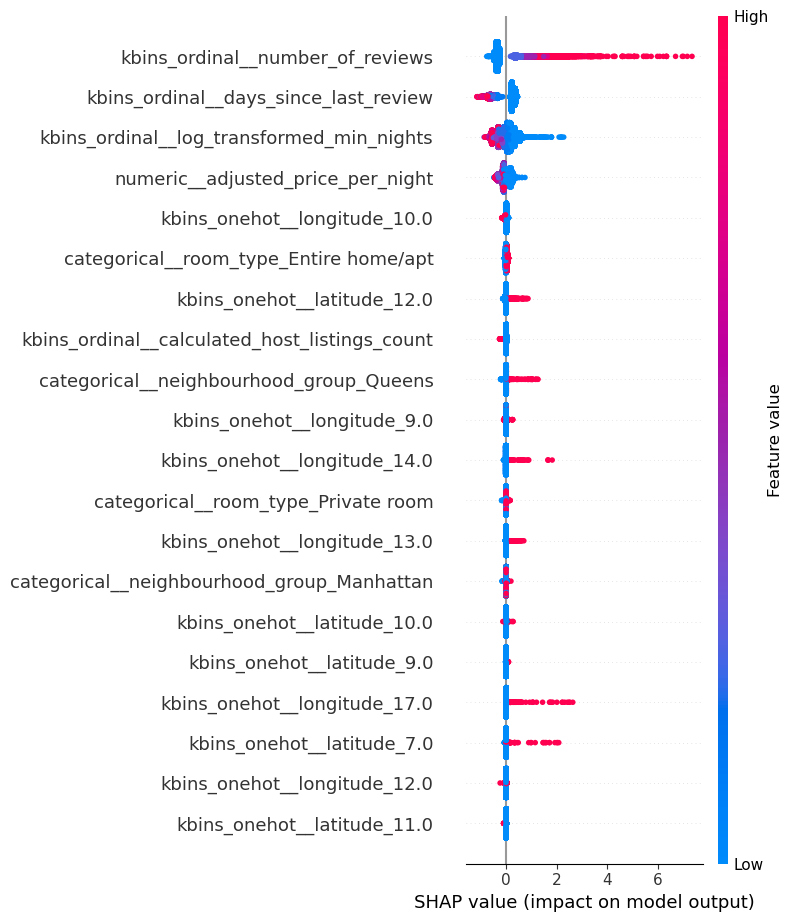

In [47]:
shap.summary_plot(shap_values, X_train_preprocessed, feature_names=clean_feature_names)

I used SHAP to analyze the Gradient Boosting model. The binned number of reviews emerges as the most important feature, indicating that listings with a larger existing review count are more likely to receive additional reviews each month. Days since the last review is another strong predictor, as recent reviews tend to signal ongoing guest engagement. The log-transformed minimum nights reveals that shorter stays are associated with higher review counts, possibly because more guests cycle through these properties. Adjusted price per night also shows a notable effect, with moderately priced listings often attracting more reviews. Location stands out as well, as indicated by features related to longitude, latitude, and room type. Overall, the model suggests that existing guest activity, recent feedback, affordability, and geographic context all play significant roles in determining how many reviews a listing will receive each month.

Waterfall Plot for Sample Index 0


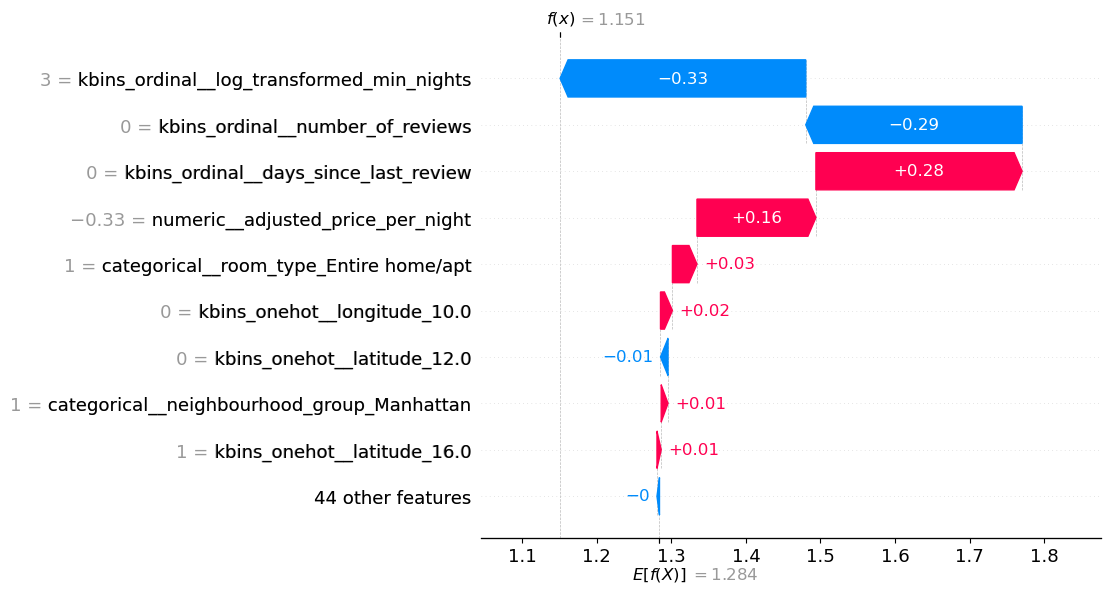

----------------------------------------------------------------------------------------------------
Waterfall Plot for Sample Index 1


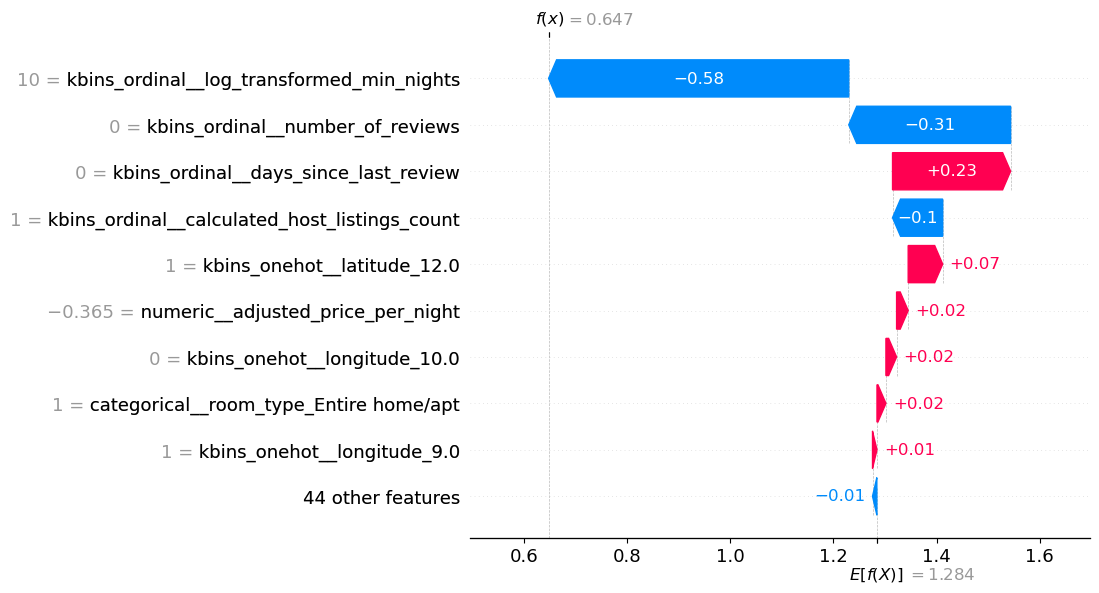

----------------------------------------------------------------------------------------------------
Waterfall Plot for Sample Index 2


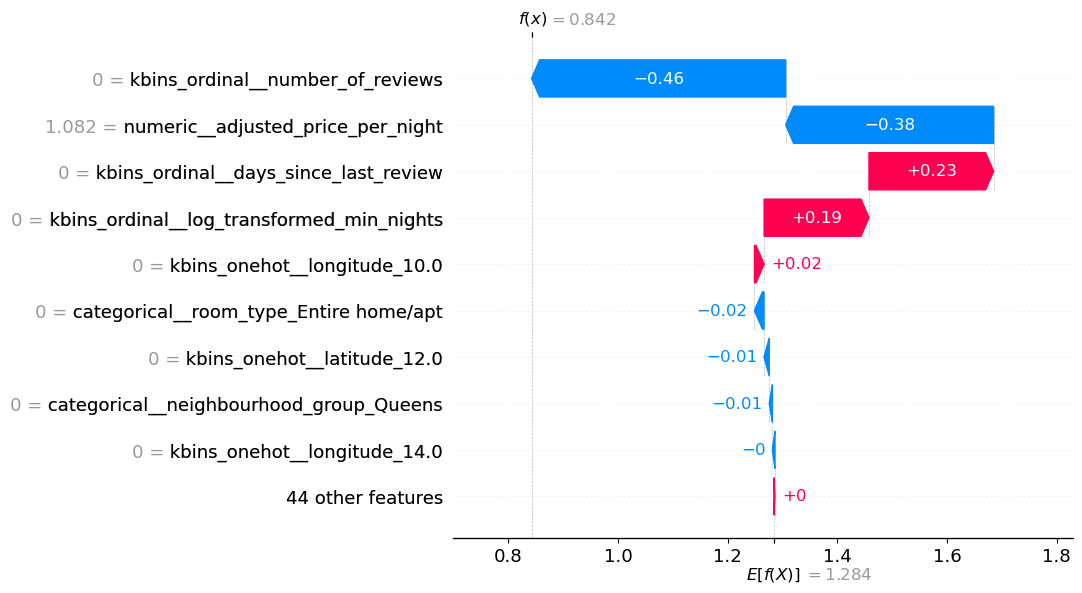

----------------------------------------------------------------------------------------------------


In [48]:
# Create the SHAP Explanation object
shap_values_exp = shap.Explanation(
    values=shap_values, 
    base_values=explainer.expected_value, 
    data=X_train_preprocessed, 
    feature_names=clean_feature_names
)

# waterfall plots for samples 0, 1, and 2
for idx in range(3):
    print(f"Waterfall Plot for Sample Index {idx}")
    shap.plots.waterfall(shap_values_exp[idx])
    print("-" * 100)


I used SHAP waterfall plots to see how each feature shifts the model’s baseline prediction for three sample listings:

- Sample 0 starts near a baseline of 1.28 reviews per month. The log-transformed minimum nights and number of reviews push the prediction downward, while recent reviews and a moderate adjusted price per night push it upward. The final prediction ends at about 1.15.

- Sample 1 also begins at 1.28 but drops to about 0.65. A high log-transformed minimum nights and a relatively large number of reviews both lower the predicted review count. Room type (Entire home/apt) and certain location bins offer small positive contributions but are outweighed by the negative effects.

- Sample 2 finishes at about 0.84 after starting at 1.28. A higher number of reviews and recent review activity raise the prediction, but a higher adjusted price per night pulls it down. This case also shows that shorter minimum nights can increase predicted reviews.
  
Overall, these individual plots confirm that review-related factors, stay requirements, pricing, and location bins consistently appear as key drivers of each listing’s predicted monthly reviews.








<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 12. Results on the test set <a name="12"></a>
<hr>

rubric={points:10}

**Your tasks:**

1. Try your best performing model on the test data and report test scores. 
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias? 
3. Take one or two test predictions and explain these individual predictions (e.g., with SHAP force plots).  

<div class="alert alert-warning">
    
Solution_12
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [49]:
# Store test results in a list of dicts
test_results = []

In [50]:
mask = pd.Series(y_test).notna()

# Ridge Evaluation
pipeline_ridge.set_params(**ridge_best_params)
pipeline_ridge.fit(X_train, y_train)
y_pred_ridge = pipeline_ridge.predict(X_test)
y_pred_ridge_series = pd.Series(y_pred_ridge, index=pd.Series(y_test).index)
test_r2_ridge = r2_score(pd.Series(y_test)[mask], y_pred_ridge_series[mask])
test_mse_ridge = mean_squared_error(pd.Series(y_test)[mask], y_pred_ridge_series[mask])

In [51]:
# Decision Tree
pipeline_dt.set_params(**dt_best_params)
pipeline_dt.fit(X_train, y_train)
y_pred_dt = pipeline_dt.predict(X_test)
y_pred_dt_series = pd.Series(y_pred_dt, index=pd.Series(y_test).index)
test_r2_dt = r2_score(pd.Series(y_test)[mask], y_pred_dt_series[mask])
test_mse_dt = mean_squared_error(pd.Series(y_test)[mask], y_pred_dt_series[mask])

In [52]:
# Random Forest
pipeline_rf.set_params(**rf_best_params)
pipeline_rf.fit(X_train, y_train)
y_pred_rf = pipeline_rf.predict(X_test)
y_pred_rf_series = pd.Series(y_pred_rf, index=pd.Series(y_test).index)
test_r2_rf = r2_score(pd.Series(y_test)[mask], y_pred_rf_series[mask])
test_mse_rf = mean_squared_error(pd.Series(y_test)[mask], y_pred_rf_series[mask])

In [53]:
# Gradient Boosting
pipeline_gb.set_params(**gb_best_params)
pipeline_gb.fit(X_train, y_train)
y_pred_gb = pipeline_gb.predict(X_test)
y_pred_gb_series = pd.Series(y_pred_gb, index=pd.Series(y_test).index)
test_r2_gb = r2_score(pd.Series(y_test)[mask], y_pred_gb_series[mask])
test_mse_gb = mean_squared_error(pd.Series(y_test)[mask], y_pred_gb_series[mask])

In [54]:
df_test_scores = pd.DataFrame({
    "Model": ["Ridge", "Decision Tree", "Random Forest", "Gradient Boosting"],
    "Test R²": [test_r2_ridge, test_r2_dt, test_r2_rf, test_r2_gb],
    "Test MSE": [test_mse_ridge, test_mse_dt, test_mse_rf, test_mse_gb]
})

df_test_scores

,Model,Test R²,Test MSE
0,Ridge,0.417279,1.269844
1,Decision Tree,0.499880,1.089842
2,Random Forest,0.517023,1.052486
3,Gradient Boosting,0.535324,1.012606


In [55]:
# Transform the test data using the same pipeline
X_test_preprocessed = pipeline_gb.named_steps["preprocessor"].transform(X_test)

# Create a SHAP explainer for the trained Gradient Boosting model
gb_model = pipeline_gb.named_steps["gb"]
explainer = shap.TreeExplainer(gb_model, X_test_preprocessed)

# Compute SHAP values for the test set
shap_values_test = explainer(X_test_preprocessed)

# Build a SHAP Explanation object
shap_values_exp_test = shap.Explanation(
    values=shap_values_test,
    base_values=explainer.expected_value,
    data=X_test_preprocessed,
    feature_names=clean_feature_names
)

 93%|=================== | 13579/14669 [00:11<00:00]       

In [56]:
print(f"Force Plot for Test Sample Index {0}")
shap.initjs()
shap.plots.force(shap_values_exp_test[0])

Force Plot for Test Sample Index 0


In [57]:
print(f"Force Plot for Test Sample Index {1}")
shap.initjs()
shap.plots.force(shap_values_exp_test[1])

Force Plot for Test Sample Index 1


In [58]:
print(f"Force Plot for Test Sample Index {2}")
shap.initjs()
shap.plots.force(shap_values_exp_test[2])

Force Plot for Test Sample Index 2


1) Best Performing Model and Test Scores
- I used Gradient Boosting with its best hyperparameters on the test set and obtained a test R² of about 0.54 and a test MSE of about 1.01. This result aligns with the validation stage, where Gradient Boosting also outperformed the other models.

2) Comparison with Validation Scores and Confidence in Results
- The test scores closely match the validation scores. For example, the Gradient Boosting model achieved a validation R² of around 0.52 and a test R² of approximately 0.54, with comparable Mean Squared Error values. This close match indicates that the model is generalizing well to new data. Although some uncertainty is inherent in hyperparameter tuning, the agreement between the test and validation results suggests that any tuning effects are minimal.




3) Explaining Individual Predictions (SHAP Force Plots)

Below are three test samples from the test set, each starting from a baseline of about 1.07 reviews per month. In these plots, pink bars represent features that lower the predicted value, while blue bars represent features that raise it. The length of each bar indicates how strongly that feature shifts the final prediction. The numeric labels under each bar can refer to specific bins or transformations of the original features.

- **Sample Index 0**  
  **Final Prediction:** ~0.82  
  The largest negative contribution (about -0.33) comes from days since the last review set to 0, which the model interprets as reducing future reviews. Another factor, adjusted price per night (around -0.11), also pulls the prediction down. Smaller positive effects are present but do not fully offset these negatives.

- **Sample Index 1**  
  **Final Prediction:** ~3.76  
  Here, days since the last review makes a strong positive contribution that pushes the estimate well above 1.07. Meanwhile, a higher adjusted price per night (about -0.33) and log-transformed minimum nights (slightly negative) lower the prediction, but not enough to overcome the large positive effect.

- **Sample Index 2**  
  **Final Prediction:** ~0.14  
  Several features pull this estimate far below the baseline. For instance, days since the last review set to 7 and having only one total review both contribute negative values, indicating limited recent guest activity. These factors combine to produce a final prediction near 0.14 reviews per month.

Overall, these force plots illustrate how review recency, price adjustments, and stay requirements can raise or lower each listing’s predicted monthly reviews, offering a detailed view of the model’s reasoning for individual test samples.


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 13. Summary of results <a name="13"></a>
<hr>
rubric={points:12}

Imagine that you want to present the summary of these results to your boss and co-workers. 

**Your tasks:**

1. Create a table summarizing important results. 
2. Write concluding remarks.
3. Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 
3. Report your final test score along with the metric you used at the top of this notebook in the [Submission instructions section](#si).

<div class="alert alert-warning">
    
Solution_13
    
</div>

_Points:_ 12

_Type your answer here, replacing this text._

| Model              | Best Hyperparameters                                     | CV Train R² | CV Train MSE | CV Test R² | CV Test MSE | Final Test R² | Final Test MSE |
|--------------------|---------------------------------------------------------|-------------|-------------:|------------|------------:|---------------|---------------:|
| **Ridge**         | ridge_alpha = 3.95                                      | 0.41        | 1.41         | 0.41       | 1.41        | 0.42          | 1.27           |
| **Decision Tree** | min_samples_split = 2, max_depth = 9                    | 1.00        | 2.19         | 0.08       | 2.19        | 0.50          | 1.09           |
| **Random Forest** | n_estimators = 15, min_samples_split = 7, max_depth = 10 | 0.92        | 1.31         | 0.45       | 1.31        | 0.52          | 1.05           |
| **Gradient Boosting** | n_estimators = 25, max_depth = 5,<br>learning_rate = 0.15 | 0.49   | 1.21    | 0.49 | 1.21 | 0.54 | 1.01 |

---

| Important Feature                                | Description                                           |
|--------------------------------------------------|-------------------------------------------------------|
| kbins_ordinal__number_of_reviews                | Binned number of existing reviews                    |
| kbins_ordinal__days_since_last_review           | Binned days since the last review                    |
| kbins_ordinal__log_transformed_min_nights       | Binned log of the minimum nights                     |
| numeric__adjusted_price_per_night               | Adjusted price per night (price / (availability_365 + 1)) |
| kbins_onehot__longitude_10.0                    | One-hot bin for a specific longitude range           |


Our goal was to predict reviews per month for New York City Airbnb listings from 2019 as a measure of listing popularity. This prediction can help Airbnb estimate the potential popularity of future listings and assist hosts in creating more appealing offerings. Among the models, ensemble methods such as the Gradient Boosting model performed best. The Gradient Boosting model achieved a test R squared of approximately 0.54 and a test mean squared error of roughly 1.01. These results match our validation scores and indicate that the model generalizes well to new data.

In addition, the SHAP force plots show that the most important features influencing predictions are the time since the last review, the adjusted price per night, and the number of minimum nights. The summary plot indicates that the binned number of existing reviews is the single most influential feature, highlighting how prior guest engagement strongly affects predicted monthly reviews. For one test sample, the absence of recent reviews and a high price per night led to a lower predicted value. For another test sample, strong recent review activity pushed the prediction to a much higher value. Overall, the force plots confirm that guest engagement and pricing details play a vital role in determining the number of monthly reviews.

---

### 3. Future Improvements and Additional Ideas

To further improve performance and interpretability, we could consider:
- **Model Stacking/Ensembling:** Combining predictions from multiple models might capture more diverse patterns in the data and improve accuracy.
- **Advanced Hyperparameter Optimization:** Techniques such as Bayesian optimization could more efficiently explore the hyperparameter space.
- **Enhanced Feature Engineering:** Developing interaction terms, polynomial features, or integrating external data could provide additional predictive context.
- **Additional Interpretability Tools:** Beyond SHAP, methods like LIME, partial dependence plots, or counterfactual analysis could offer further insights into model behavior and make results more accessible to non-technical stakeholders.





### 4. Final Test Score

The final test score for our best performing model (Gradient Boosting) is a test R² of **0.54** and a test MSE of **1.01**. I used R² as the primary evaluation metric.


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 14. Your takeaway <a name="15"></a>
<hr>
rubric={points:2}

**Your tasks:**

What is your biggest takeaway from the supervised machine learning material we have learned so far? Please write thoughtful answers.  

<div class="alert alert-warning">
    
Solution_14
    
</div>

_Points:_ 2

My biggest takeaway from the supervised machine learning material is that building effective models requires a comprehensive approach. It is important not only to tune models using methods such as cross validation and hyperparameter optimization but also to understand what drives their predictions using tools like SHAP. I found that using randomized search to find optimal hyperparameters is a very efficient way to explore a large parameter space and often leads to significant improvements in model performance. By focusing equally on performance, feature engineering, and interpretability, we can build models that work reliably on new data and provide clear explanations for their predictions.

<!-- END QUESTION -->

<br><br>

**PLEASE READ BEFORE YOU SUBMIT:** 

When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from "1" will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
4. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 
5. Make sure that the plots and output are rendered properly in your submitted file. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb so that the TAs can view your submission on Gradescope. 

This was a tricky one but you did it! 

![](img/eva-well-done.png)